The approval, disapproval and dropout rates comprise a group called "school performance rates", where each one represents a percentage of total enrollment or remaining enrolled students (final balance of initial enrollment), considering the situations of transfers, admissions and reclassifications (entry and exit).

\begin{equation}
\text{ApprovalRate}_{y}=\frac{Approved_{y}}{Remaining_{y}} \times 100
\end{equation}

\begin{equation}
\text{FailureRate}_{y}=\frac{Failed_{y}}{Remaining_{y}} \times 100
\end{equation}

\begin{equation}
\text{DropoutRate}_{y}=100 - ({ApprovalRate}_{y} - {FailureRate}_{y})
\end{equation}


\begin{align*}
\text{where: }& \\
Approved_{y} &= \text{number of approved students in the year or group of years }y;\\
Failed_{y} &= \text{number of failed students in the year or group of years }y;\\
E_{y} &= \text{number of initial enrollments in the year or group of year }y ;\\
L_{y} &= \text{number of students who left due to dropout or transfer in the year or group of years }y;\\
A_{y} &= \text{number of students admitted by transfer in the year or group of years }y;\\
Rin_{y} &= \text{number of reclassified students in the year or group of years }y;\\
Rout_{y} &= \text{number of students who left in the year or group of years }y\text{, by reclassification;}\\
Remaining_{y} &= E_{y}-L_{y}+A_{y}+Rin_{y}-Rout_{y}.\\
& \text{(number of remaining students in the year or group of years $y$}\\
\text{and: }& \\
y &= \text{elementary school (year, }1^{\mathrm{st}}\text{ to }4^{\mathrm{th}}, 5^{\mathrm{th}}\text{ to }9^{\mathrm{th}}, total)\text{, high school (year, total).}
\end{align*}

Reference for INEP Rates formulas: <https://download.inep.gov.br/publicacoes/institucionais/estatisticas_e_indicadores/dicionario_de_indicadores_educacionais_formulas_de_calculo.pdf> (pag. 19)

Reclassification is a process that can take place during the academic year, in which a student who enters a certain grade can be reassigned, due to a previous assessment, to a more advanced grade, different from the grade corresponding to their initial enrollment. This student is evaluated in the grade to which he/she was reassigned, receiving the status of pass, fail or drop out.

### RQ5. Did the pandemic increase the school dropout rate?

In [54]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data of all available years of School Dropout Rates

In [55]:
data = pd.read_csv('data/final_performance_school_dropout.csv')
data

,Ano,Rede,Localização,1EF,2EF,3EF,4EF,5EF,6EF,7EF,8EF,9EF,Total - EF,1EM,2EM,3EM,4EM,Não-Seriado,Total - EM
0,2007,Estadual,Rural,3.600000,6.3,4.1,4.2,4.9,7.4,6.900000,6.5,6.7,6.0,18.3,14.1,10.2,10.200000,15.500000,14.9
1,2007,Federal,Rural,1.358704,0.0,0.0,0.0,0.0,0.0,3.046215,4.8,0.0,1.4,5.0,1.8,0.8,5.695618,3.000000,2.9
2,2007,Municipal,Rural,4.300000,7.5,5.2,5.6,5.8,11.3,9.600000,9.7,8.3,7.0,19.0,13.4,8.4,3.700000,11.700000,14.7
3,2007,Privada,Rural,1.300000,2.5,1.8,1.3,1.2,3.1,2.200000,2.1,1.2,1.9,2.7,1.2,0.8,2.200000,9.516116,1.7
4,2007,Pública,Rural,4.300000,7.4,5.1,5.5,5.7,10.6,9.100000,9.0,7.9,6.9,17.8,13.5,9.6,7.200000,11.800000,14.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2020,Privada,Urbana,5.000000,3.1,2.4,1.9,1.4,1.1,0.900000,0.7,0.6,2.0,0.5,0.4,0.2,13.800000,5.800000,0.4
248,2020,Privada,Rural,3.600000,2.1,2.5,2.0,1.3,1.4,1.000000,1.0,1.4,1.9,5.6,3.1,3.1,4.200000,2.000000,4.2
249,2020,Pública,Total,0.500000,0.4,0.6,0.6,0.7,1.3,1.300000,1.2,1.1,0.8,2.9,2.3,2.1,7.800000,2.300000,2.6
250,2020,Pública,Urbana,0.500000,0.4,0.5,0.5,0.6,1.3,1.200000,1.0,1.0,0.8,2.9,2.3,2.2,7.800000,2.500000,2.5


## Filtering the totals of School Dropouts Rates of Elementary School and High School

In [78]:
# EF - Ensino Fundamental - Ementary School
# EM - Ensino Médio - High School
totals = data.query('Rede == "Total" and Localização == "Total"')[['Ano','Total - EF', 'Total - EM']]
totals.index = totals.Ano
totals

,Ano,Total - EF,Total - EM
Ano,,,
2007,2007,4.8,13.2
2008,2008,4.4,12.8
2009,2009,3.7,11.5
2010,2010,3.1,10.3
2011,2011,2.8,9.5
2012,2012,2.7,9.1
2013,2013,2.2,8.1
2014,2014,2.2,7.6
2015,2015,1.9,6.8


## School Dropout (%) before and during the Covid-19 Pandemic

### Ploting the line chart of the data

In [139]:
# Constants
x_shift = 0.13
y_shift = 0.15
markersize=9


In [58]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

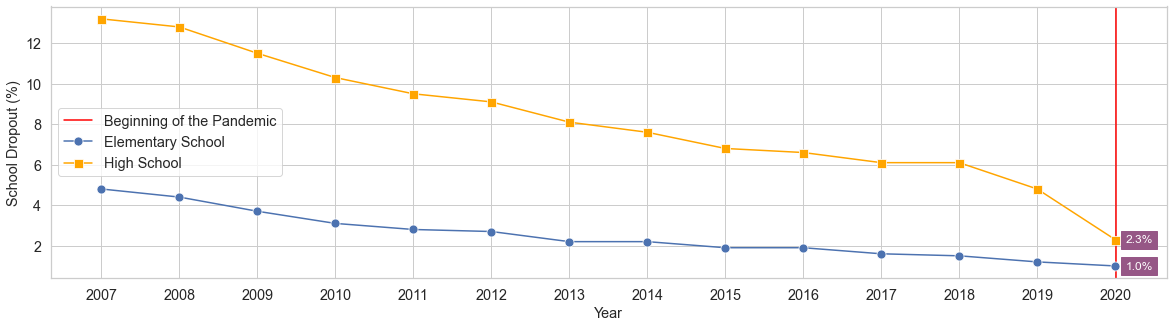

In [59]:
plt.figure(figsize=(20,5))
sns.set_style("whitegrid")
plt.axvline(x=2020.01, label="Beginning of the Pandemic", color='red', linestyle='-')
ax = sns.lineplot(data=totals, x='Ano', y='Total - EF', label="Elementary School", marker="o", markersize=markersize)
ax.set(xticks=totals.Ano.values)
sns.lineplot(data=totals, x='Ano', y='Total - EM', label="High School", marker="s", markersize=markersize,color="orange")
plt.title("")
plt.ylabel("School Dropout (%)")
plt.xlabel("Year")
y_2020_EM = totals[totals.Ano == 2020]['Total - EM'].iloc[0]
plt.text(2020+x_shift, y_2020_EM-y_shift, '{:.1f}%'.format(y_2020_EM), color='white').set_backgroundcolor('#965786')
y_2020_EF = totals[totals.Ano == 2020]['Total - EF'].iloc[0]
plt.text(2020+x_shift, y_2020_EF-y_shift, '{:.1f}%'.format(y_2020_EF), color='white').set_backgroundcolor('#965786')
plt.legend()
plt.show()

* We can see a higher decrease in High School Rates during the Covid-19 Pandemic then in Elementary School Rates;
* But with this line chart visualization of the actual data it is not clear if this decrease is below the tendency of each case;
* The question does not mention a separate evaluation of each education level, but a general one;
* We chose to keep separate lines for each education level because an Arithmetic Avarage of the Dropout Rates is not equivalent of a global Dropout Rate calculated with the sum of total numbers of *Approved* and *Failed* students divided by the sum of total *Remaining* enrolled students of each education level. Since we do not have this information available, only the *ApprovalRate*, *FailureRate* and *DropoutRate* of each education level.

Example of combining percentages: <http://jwilson.coe.uga.edu/EMT725/Percentages/Percentages.html><br />

## Ploting a regression line of the data

In [60]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

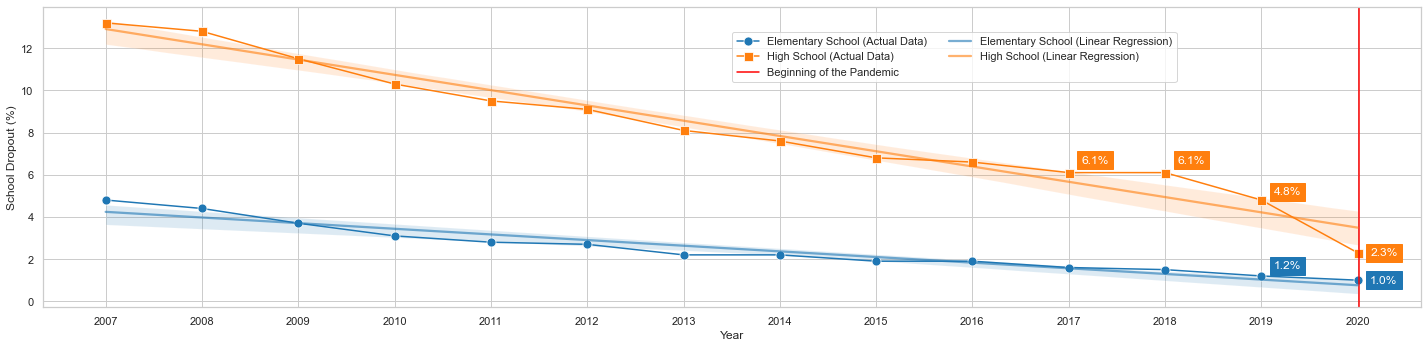

In [154]:
plt.figure(figsize=(20,5))
sns.set_style("whitegrid")
ax = sns.lineplot(data=totals, x='Ano', y='Total - EF', label="Elementary School (Actual Data)", marker="o", markersize=markersize, linestyle='-', color='tab:blue')
sns.lineplot(data=totals, x='Ano', y='Total - EM', label="High School (Actual Data)", marker="s", markersize=markersize, color='tab:orange', linestyle='-')
plt.axvline(x=2020.01, label="Beginning of the Pandemic", color='red', linestyle='-')
ax = sns.regplot(data=totals, x='Ano', y='Total - EF', label="Elementary School (Linear Regression)", scatter=False, color='tab:blue',line_kws={"alpha":0.6})
ax.set(xticks=totals.Ano.values)
sns.regplot(data=totals, x='Ano', y='Total - EM', label="High School (Linear Regression)", scatter=False, color='tab:orange', line_kws={"alpha":0.6})
plt.ylabel("School Dropout (%)")
plt.title('')
plt.xlabel("Year")
y_2020_EM = totals[totals.Ano == 2020]['Total - EM'].iloc[0]
plt.text(2020+x_shift, y_2020_EM-y_shift, '{:.1f}%'.format(y_2020_EM), color='white').set_backgroundcolor('tab:orange')
y_2019_EM = totals[totals.Ano == 2019]['Total - EM'].iloc[0]
plt.text(2019+x_shift, y_2019_EM-y_shift+.4, '{:.1f}%'.format(y_2019_EM), color='white').set_backgroundcolor('tab:orange')
y_2018_EM = totals[totals.Ano == 2018]['Total - EM'].iloc[0]
plt.text(2018+x_shift, y_2018_EM-y_shift+.6, '{:.1f}%'.format(y_2018_EM), color='white').set_backgroundcolor('tab:orange')
y_2017_EM = totals[totals.Ano == 2017]['Total - EM'].iloc[0]
plt.text(2017+x_shift, y_2017_EM-y_shift+.6, '{:.1f}%'.format(y_2017_EM), color='white').set_backgroundcolor('tab:orange')
y_2020_EF = totals[totals.Ano == 2020]['Total - EF'].iloc[0]
plt.text(2020+x_shift, y_2020_EF-y_shift, '{:.1f}%'.format(y_2020_EF), color='white').set_backgroundcolor('tab:blue')
y_2019_EF = totals[totals.Ano == 2019]['Total - EF'].iloc[0]
plt.text(2019+x_shift, y_2019_EF-y_shift+.5, '{:.1f}%'.format(y_2019_EF), color='white').set_backgroundcolor('tab:blue')
# for index, row in totals.iterrows():
#     plt.text(code[row.Ano]+x_shift, row.Dropout-y_shift, row.Ano, color='white', fontsize='small', bbox=dict(facecolor='#965786', alpha=0.7))
plt.legend(bbox_to_anchor=(.5, .75, 1., .102), loc=3, ncol=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

In [62]:
totals

,Ano,Total - EF,Total - EM
11,2007,4.8,13.2
29,2008,4.4,12.8
36,2009,3.7,11.5
70,2010,3.1,10.3
72,2011,2.8,9.5
90,2012,2.7,9.1
108,2013,2.2,8.1
126,2014,2.2,7.6
144,2015,1.9,6.8
162,2016,1.9,6.6


## Calculating the differences between each year taxes

In [ ]:
def diff_year_before(df, row, index_year):
    # index_year = row.index
    # print(index_year)
    year_befere = index_year-1
    data = {'EF_DIFF': 0, 'EM_DIFF': 0}
    if year_befere in df.index.values:
        data['EF_DIFF'] = df.loc[index_year,'Total - EF'] - df.loc[year_befere,'Total - EF']
        data['EM_DIFF'] = df.loc[index_year,'Total - EM'] - df.loc[year_befere,'Total - EM']
    return pd.Series(data, name=index_year)

In [ ]:
totals[['EF_DIFF','EM_DIFF']] = totals.apply(lambda row: diff_year_before(totals, row, row['Ano']), axis=1)
totals

,Ano,Total - EF,Total - EM,EF_DIFF,EM_DIFF
Ano,,,,,
2007,2007,4.8,13.2,0.0,0.0
2008,2008,4.4,12.8,-0.4,-0.4
2009,2009,3.7,11.5,-0.7,-1.3
2010,2010,3.1,10.3,-0.6,-1.2
2011,2011,2.8,9.5,-0.3,-0.8
2012,2012,2.7,9.1,-0.1,-0.4
2013,2013,2.2,8.1,-0.5,-1.0
2014,2014,2.2,7.6,0.0,-0.5
2015,2015,1.9,6.8,-0.3,-0.8


In [ ]:
totals[['EF_DIFF','EM_DIFF']].describe()

,EF_DIFF,EM_DIFF
count,14.000000,14.000000
mean,-0.271429,-0.778571
std,0.223361,0.663532
min,-0.700000,-2.500000
25%,-0.375000,-1.150000
50%,-0.300000,-0.650000
75%,-0.100000,-0.400000
max,0.000000,0.000000


In [63]:
totals_ef = totals[['Ano', 'Total - EF']].reset_index(drop=True)
totals_ef['Level'] = 'Elementary School'
totals_ef.rename(columns={'Ano': 'Year', 'Total - EF': 'Dropout'}, inplace=True)
totals_ef


,Year,Dropout,Level
0,2007,4.8,Elementary School
1,2008,4.4,Elementary School
2,2009,3.7,Elementary School
3,2010,3.1,Elementary School
4,2011,2.8,Elementary School
5,2012,2.7,Elementary School
6,2013,2.2,Elementary School
7,2014,2.2,Elementary School
8,2015,1.9,Elementary School
9,2016,1.9,Elementary School


In [64]:
totals_em = totals[['Ano', 'Total - EM']].reset_index(drop=True)
totals_em['Level'] = 'High School'
totals_em.rename(columns={'Ano': 'Year', 'Total - EM': 'Dropout'}, inplace=True)
totals_em

,Year,Dropout,Level
0,2007,13.2,High School
1,2008,12.8,High School
2,2009,11.5,High School
3,2010,10.3,High School
4,2011,9.5,High School
5,2012,9.1,High School
6,2013,8.1,High School
7,2014,7.6,High School
8,2015,6.8,High School
9,2016,6.6,High School


In [65]:
totals_transformed = pd.concat([totals_ef, totals_em])
totals_transformed

,Year,Dropout,Level
0,2007,4.8,Elementary School
1,2008,4.4,Elementary School
2,2009,3.7,Elementary School
3,2010,3.1,Elementary School
4,2011,2.8,Elementary School
5,2012,2.7,Elementary School
6,2013,2.2,Elementary School
7,2014,2.2,Elementary School
8,2015,1.9,Elementary School
9,2016,1.9,Elementary School


In [66]:
# Constants
y_shift = 0.07

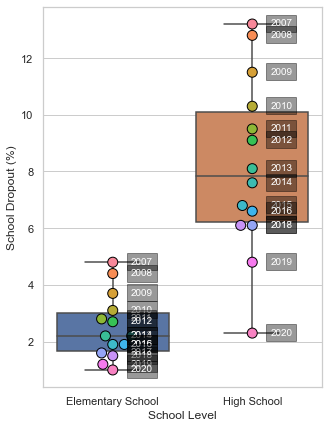

In [67]:
plt.figure(figsize=(5,7))
sns.set(style="whitegrid")
ax = sns.boxplot(x='Level', y="Dropout", data=totals_transformed, showfliers = True)
ax = sns.swarmplot(x='Level', y="Dropout", data=totals_transformed, hue='Year', edgecolor='black', linewidth=1.0, s=10)
ax.set_xlabel("School Level")
ax.set_ylabel("School Dropout (%)")
code = {'Elementary School': 0, 'High School': 1}
for index, row in totals_transformed.iterrows():
    plt.text(code[row.Level]+x_shift, row.Dropout-y_shift, row.Year, color='white', fontsize='small'
            , bbox=dict(facecolor='black', alpha=0.4, edgecolor='black')
             )
# # ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
ax.legend().remove()
plt.show()

In [68]:
# uncomment to install dependency
#!pip install ThymeBoost 

In [69]:
totals.index = totals.Ano

In [70]:
series = totals.drop(columns='Ano', axis=1).rename(columns={'Total - EF': 'Elementary School',
                                                    'Total - EM': 'High School'})
series

,Elementary School,High School
Ano,,
2007,4.8,13.2
2008,4.4,12.8
2009,3.7,11.5
2010,3.1,10.3
2011,2.8,9.5
2012,2.7,9.1
2013,2.2,8.1
2014,2.2,7.6
2015,1.9,6.8


<https://github.com/tblume1992/ThymeBoost>

## Training the model with a linear estimator

In [166]:
def plot_results(fitted_df, title=None, xlabel=None, ylabel=None, predicted_df=None, figsize=None, ax=None, color=None):
    """Simple plot of results for convenience"""
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    if color is None:
        color = 'blue'
    ax.plot(fitted_df['y'], color=color)
    ax.plot(fitted_df['yhat'], color='black')
    ax.plot(fitted_df['yhat_upper'],
            linestyle='dashed',
            alpha=.5,
            color='black')
    ax.plot(fitted_df['yhat_lower'],
            linestyle='dashed',
            alpha=.5,
            color='black')
    if predicted_df is not None:
        ax.plot(fitted_df['yhat'].tail(1).append(predicted_df['predictions']),
                color='red',
                linestyle='dashed')
        ax.fill_between(x=fitted_df['yhat_lower'].tail(1).append(predicted_df['predicted_lower']).index,
                        y1=fitted_df['yhat_lower'].tail(1).append(predicted_df['predicted_lower']).values,
                        y2=fitted_df['yhat_upper'].tail(1).append(predicted_df['predicted_upper']).values,
                        alpha=.5,
                        color='black')
    if title is None:
        ax.set_title('ThymeBoost Results')
    else:
        ax.set_title(title)
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    if 'outliers' in fitted_df.columns:
        outlier_df = fitted_df[fitted_df['outliers'] == True]
        ax.scatter(outlier_df.index, outlier_df['y'], marker='x', color='red')

In [167]:
from ThymeBoost import ThymeBoost as tb


def train(series, trend_estimator='linear', seasonal_estimator='fourier', seasonal_period=0, split_cost='mse', global_cost='maicc', fit_type='global'):
    boosted_model = tb.ThymeBoost(approximate_splits=True,
                                n_split_proposals=25,
                                verbose=0,
                                cost_penalty=.001)
    output = boosted_model.fit(series,
                            trend_estimator=trend_estimator,
                            seasonal_estimator=seasonal_estimator,
                            seasonal_period=seasonal_period,
                            split_cost=split_cost,
                            global_cost=global_cost,
                            fit_type=fit_type)
    return output

In [168]:
xlabel = 'Year'
ylabel = 'Dropout Rate (%)'

variable1 = 'Elementary School'
variable2 = 'High School'

variable1_color = sns.color_palette()[0]
variable2_color = sns.color_palette()[1]

plotting_infos = [{'fitted_df': train(series[variable1]), 
                    'title': 'Linear Estimator', 'xlabel': xlabel, 'ylabel': f'{variable1} {ylabel}', 'color': variable1_color},
                 {'fitted_df': train(series[variable1], trend_estimator='arima'), 
                    'title': 'Arima Estimator', 'xlabel': xlabel, 'ylabel': f'{variable1} {ylabel}', 'color': variable1_color},
                 {'fitted_df': train(series[variable1], trend_estimator='mean'), 
                    'title': 'Mean Estimator', 'xlabel': xlabel, 'ylabel': f'{variable1} {ylabel}', 'color': variable1_color},
                 {'fitted_df': train(series[variable2]), 
                    'title': 'Linear Estimator', 'xlabel': xlabel, 'ylabel': f'{variable2} {ylabel}', 'color': variable2_color},
                 {'fitted_df': train(series[variable2], trend_estimator='arima'), 
                    'title': 'Arima Estimator', 'xlabel': xlabel, 'ylabel': f'{variable2} {ylabel}', 'color': variable2_color},
                 {'fitted_df': train(series[variable2], trend_estimator='mean'), 
                    'title': 'Mean Estimator', 'xlabel': xlabel, 'ylabel': f'{variable2} {ylabel}', 'color': variable2_color}]

In [169]:
from matplotlib import pyplot as plt

def plot_grid(functions_and_parameters, n_cols=3, values_mapping=None, width_scale=5.5, height_scale=4):
    Tot = len(functions_and_parameters)
    # Compute Rows required
    n_rows = Tot // n_cols
    n_rows += Tot % n_cols
    fig = plt.figure(1)
    fig.set_figwidth(n_cols*width_scale)
    fig.set_figheight(n_rows*height_scale)
    for position, functions_and_parameter in enumerate(functions_and_parameters):
        ax = fig.add_subplot(n_rows, n_cols, position+1)
        kwargs = {'ax': ax}
        function = functions_and_parameter[0]
        parameters = functions_and_parameter[1]
        function(**parameters, **kwargs)
    plt.show()

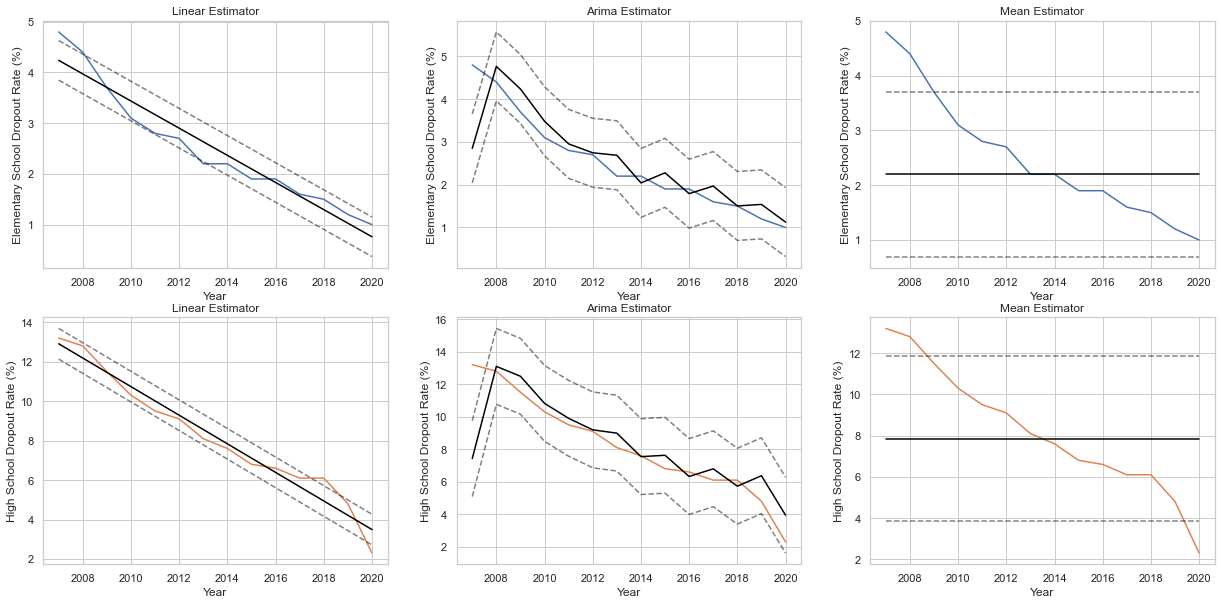

In [170]:
plot_grid([[plot_results, plotting_info] for plotting_info in plotting_infos], n_cols=3, width_scale=7, height_scale=5)

In [176]:
index = -1

In [177]:
index += 1
print(f"{plotting_infos[index]['title']} for {plotting_infos[index]['ylabel']}")
plotting_infos[index]['fitted_df']

Linear Estimator for Elementary School Dropout Rate (%)


,y,yhat,yhat_upper,yhat_lower,seasonality,trend
Ano,,,,,,
2007,4.8,4.240000,4.630082,3.849918,0.0,4.240000
2008,4.4,3.972308,4.362389,3.582226,0.0,3.972308
2009,3.7,3.704615,4.094697,3.314534,0.0,3.704615
2010,3.1,3.436923,3.827005,3.046841,0.0,3.436923
2011,2.8,3.169231,3.559313,2.779149,0.0,3.169231
2012,2.7,2.901538,3.291620,2.511457,0.0,2.901538
2013,2.2,2.633846,3.023928,2.243764,0.0,2.633846
2014,2.2,2.366154,2.756236,1.976072,0.0,2.366154
2015,1.9,2.098462,2.488543,1.708380,0.0,2.098462


In [178]:
index += 1
print(f"{plotting_infos[index]['title']} for {plotting_infos[index]['ylabel']}")
plotting_infos[index]['fitted_df']

Arima Estimator for Elementary School Dropout Rate (%)


,y,yhat,yhat_upper,yhat_lower,seasonality,trend
Ano,,,,,,
2007,4.8,2.847299,3.652849,2.041749,0.0,2.847299
2008,4.4,4.764179,5.569729,3.958629,0.0,4.764179
2009,3.7,4.235752,5.041303,3.430202,0.0,4.235752
2010,3.1,3.482131,4.287681,2.676580,0.0,3.482131
2011,2.8,2.953500,3.759050,2.147950,0.0,2.953500
2012,2.7,2.745532,3.551082,1.939982,0.0,2.745532
2013,2.2,2.687848,3.493398,1.882298,0.0,2.687848
2014,2.2,2.041794,2.847345,1.236244,0.0,2.041794
2015,1.9,2.277088,3.082638,1.471538,0.0,2.277088


In [179]:
index += 1
print(f"{plotting_infos[index]['title']} for {plotting_infos[index]['ylabel']}")
plotting_infos[index]['fitted_df']

Mean Estimator for Elementary School Dropout Rate (%)


,y,yhat,yhat_upper,yhat_lower,seasonality,trend
Ano,,,,,,
2007,4.8,2.2,3.70293,0.69707,0.0,2.2
2008,4.4,2.2,3.70293,0.69707,0.0,2.2
2009,3.7,2.2,3.70293,0.69707,0.0,2.2
2010,3.1,2.2,3.70293,0.69707,0.0,2.2
2011,2.8,2.2,3.70293,0.69707,0.0,2.2
2012,2.7,2.2,3.70293,0.69707,0.0,2.2
2013,2.2,2.2,3.70293,0.69707,0.0,2.2
2014,2.2,2.2,3.70293,0.69707,0.0,2.2
2015,1.9,2.2,3.70293,0.69707,0.0,2.2


In [180]:
index += 1
print(f"{plotting_infos[index]['title']} for {plotting_infos[index]['ylabel']}")
plotting_infos[index]['fitted_df']

Linear Estimator for High School Dropout Rate (%)


,y,yhat,yhat_upper,yhat_lower,seasonality,trend
Ano,,,,,,
2007,13.2,12.908571,13.684537,12.132606,0.0,12.908571
2008,12.8,12.184176,12.960142,11.408210,0.0,12.184176
2009,11.5,11.459780,12.235746,10.683814,0.0,11.459780
2010,10.3,10.735385,11.511350,9.959419,0.0,10.735385
2011,9.5,10.010989,10.786955,9.235023,0.0,10.010989
2012,9.1,9.286593,10.062559,8.510628,0.0,9.286593
2013,8.1,8.562198,9.338164,7.786232,0.0,8.562198
2014,7.6,7.837802,8.613768,7.061836,0.0,7.837802
2015,6.8,7.113407,7.889372,6.337441,0.0,7.113407


In [181]:
index += 1
print(f"{plotting_infos[index]['title']} for {plotting_infos[index]['ylabel']}")
plotting_infos[index]['fitted_df']

Arima Estimator for High School Dropout Rate (%)


,y,yhat,yhat_upper,yhat_lower,seasonality,trend
Ano,,,,,,
2007,13.2,7.420815,9.753080,5.088550,0.0,7.420815
2008,12.8,13.096388,15.428653,10.764123,0.0,13.096388
2009,11.5,12.486700,14.818965,10.154435,0.0,12.486700
2010,10.3,10.820006,13.152271,8.487741,0.0,10.820006
2011,9.5,9.899537,12.231802,7.567272,0.0,9.899537
2012,9.1,9.192134,11.524399,6.859869,0.0,9.192134
2013,8.1,8.988150,11.320415,6.655885,0.0,8.988150
2014,7.6,7.543611,9.875876,5.211346,0.0,7.543611
2015,6.8,7.627856,9.960121,5.295591,0.0,7.627856


In [182]:
index += 1
print(f"{plotting_infos[index]['title']} for {plotting_infos[index]['ylabel']}")
plotting_infos[index]['fitted_df']

Mean Estimator for High School Dropout Rate (%)


,y,yhat,yhat_upper,yhat_lower,seasonality,trend
Ano,,,,,,
2007,13.2,7.85,11.853584,3.846416,0.0,7.85
2008,12.8,7.85,11.853584,3.846416,0.0,7.85
2009,11.5,7.85,11.853584,3.846416,0.0,7.85
2010,10.3,7.85,11.853584,3.846416,0.0,7.85
2011,9.5,7.85,11.853584,3.846416,0.0,7.85
2012,9.1,7.85,11.853584,3.846416,0.0,7.85
2013,8.1,7.85,11.853584,3.846416,0.0,7.85
2014,7.6,7.85,11.853584,3.846416,0.0,7.85
2015,6.8,7.85,11.853584,3.846416,0.0,7.85


## Experimenting different Arima parameters

In [76]:
xlabel = 'Year'
ylabel = 'Dropout Rate (%)'

variable1 = 'Elementary School'
variable2 = 'High School'

title_base = 'Arima Estimator'
trend_estimaor = 'arima'

variables = [variable1, variable2]
approximate_splits = [True, False]
n_split_proposals = [10, 15, 20, 25]
cost_penalties = [0.001, 0.0005, 0.0001]

n_experiments = len(variables) * len(approximate_splits) * len(n_split_proposals) * len(cost_penalties)
n_experiments

48

In [77]:
plotting_infos = []
for variable in variables:
	for approximate_split in approximate_splits:
		for n_split_proposal in n_split_proposals:
			for cost_penalty in cost_penalties:
				plotting_infos.append({'fitted_df': train(series[variable], trend_estimator=trend_estimaor), 
			   					'title': f'{title_base} A. Splits({approximate_split}) N.Splits Prop.({n_split_proposal}) Cost P.({cost_penalty}))', 'xlabel': xlabel, 'ylabel': f'{variable} {ylabel}'})

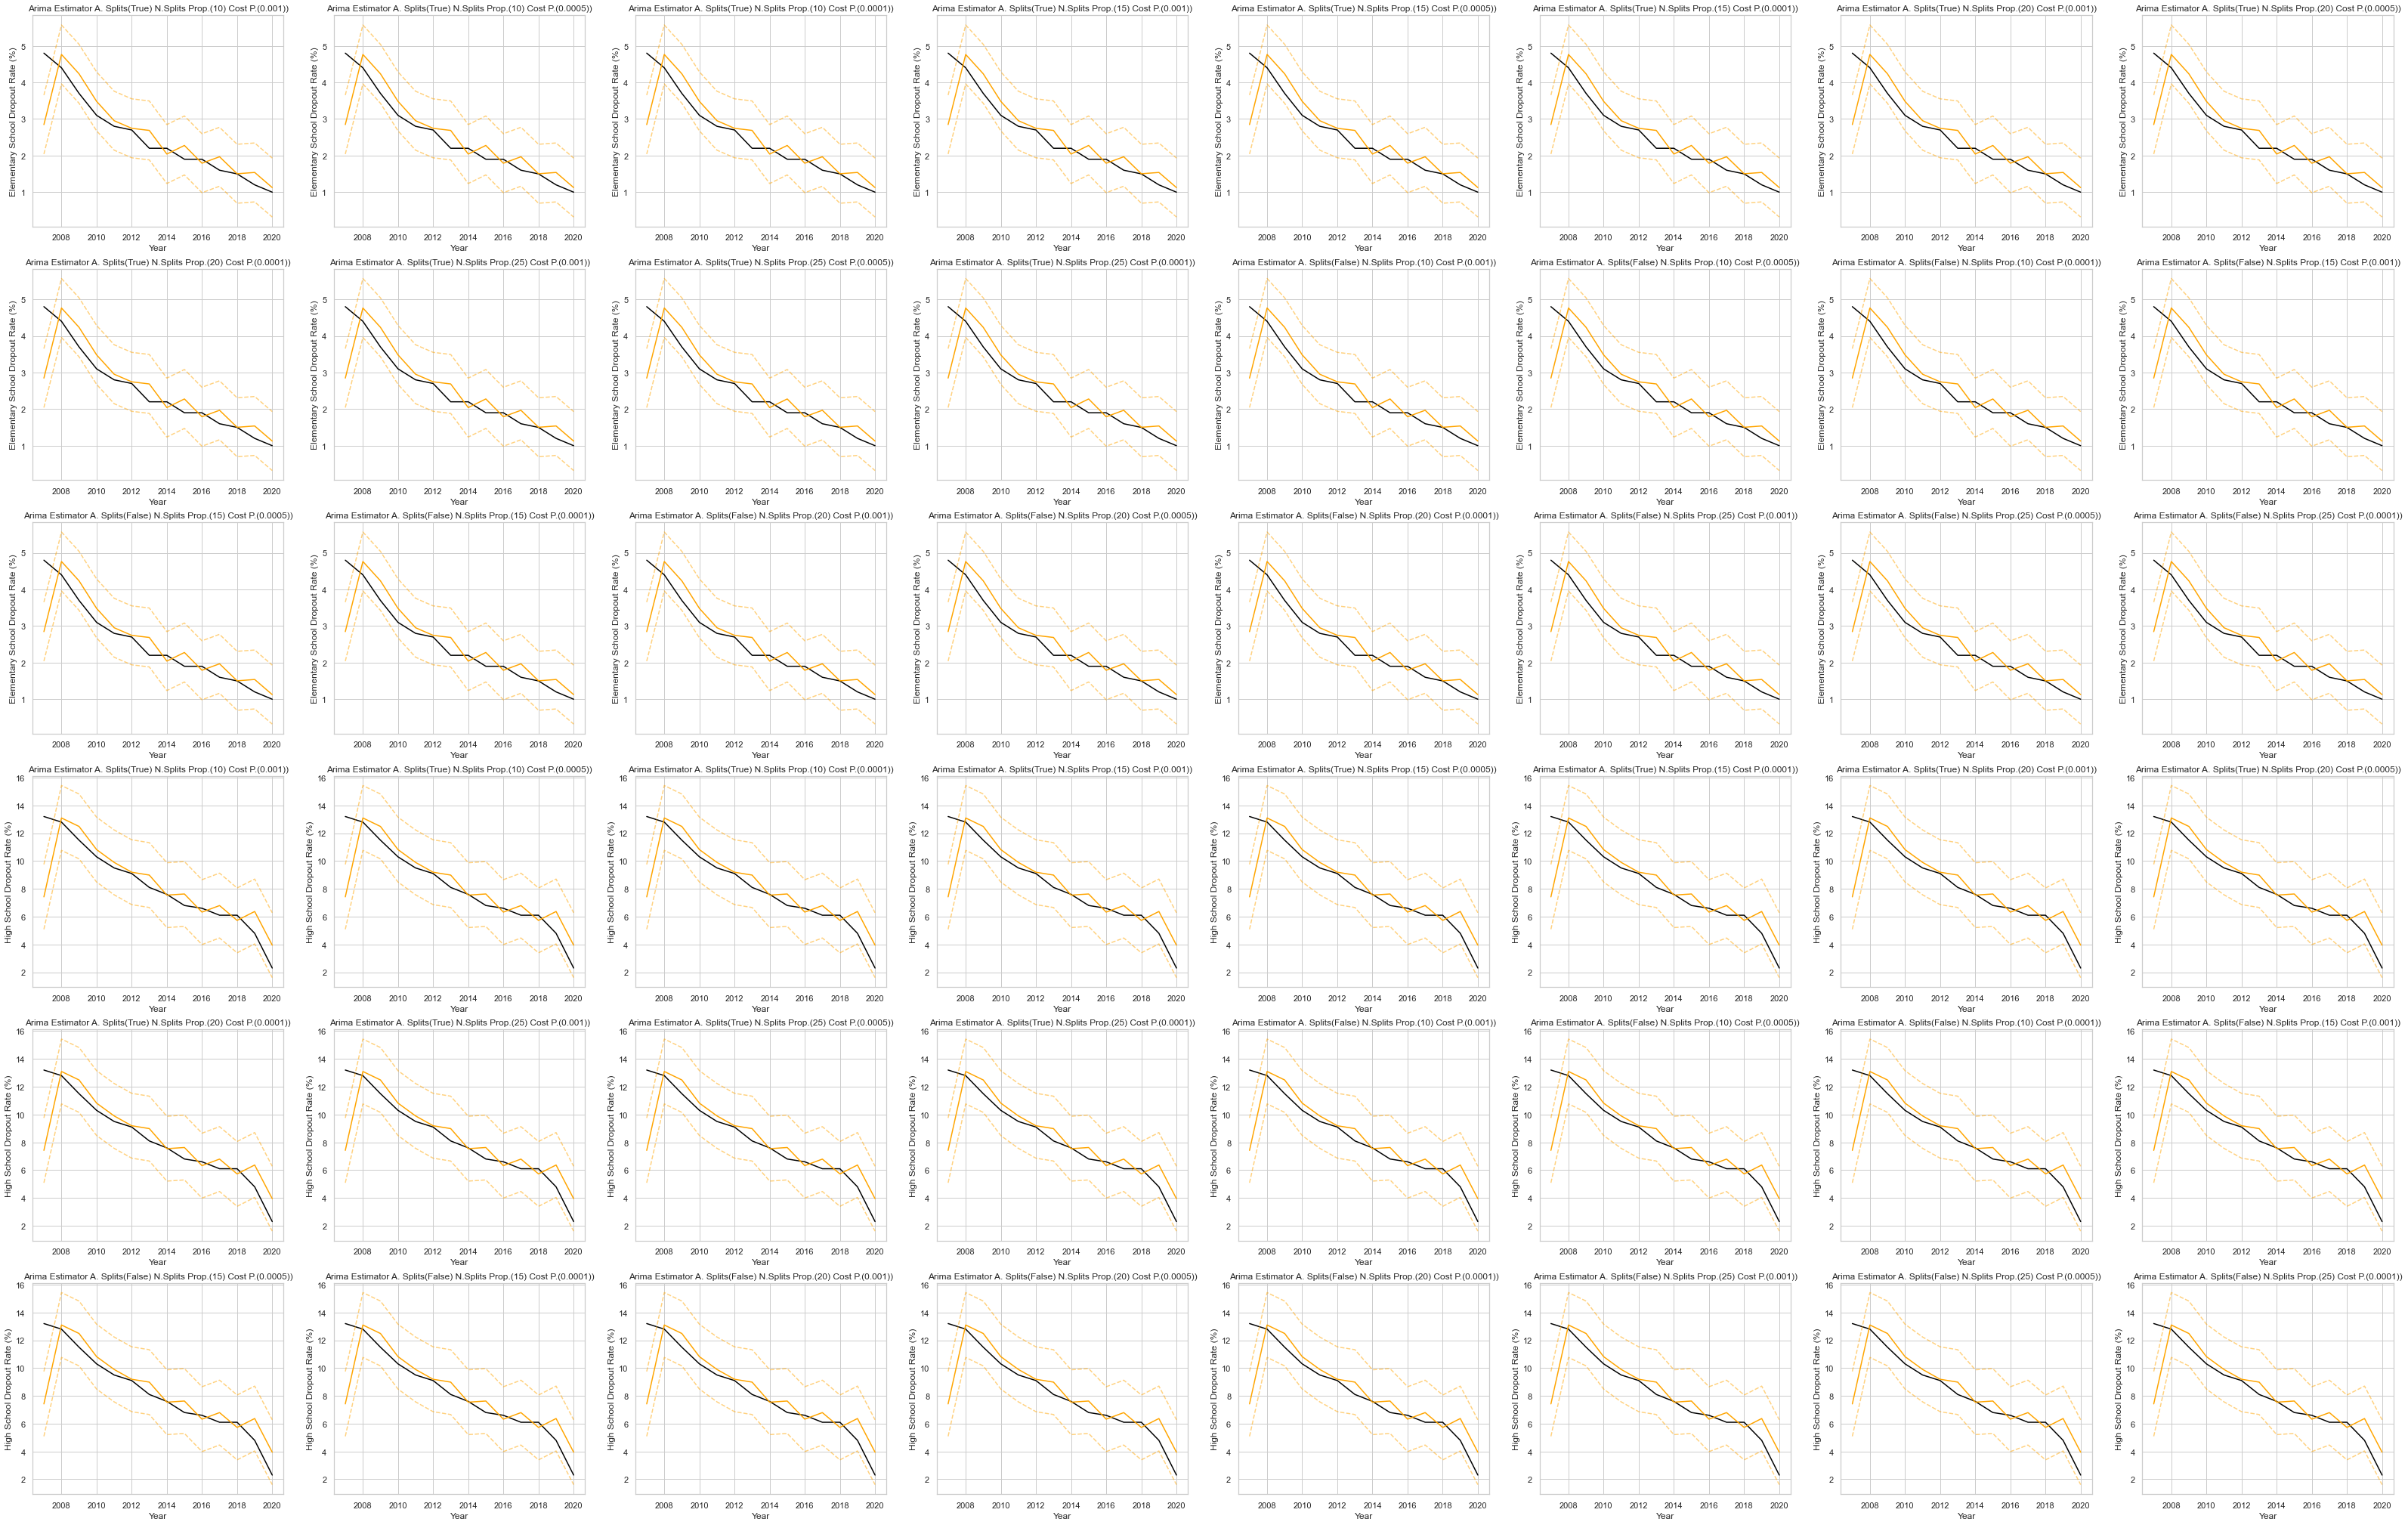

In [52]:
plot_grid([[plot_results, plotting_info] for plotting_info in plotting_infos], n_cols=8, width_scale=7, height_scale=6)

In [53]:
plotting_infos[0]['fitted_df'].compare(plotting_infos[-1]['fitted_df'])

y            yhat            yhat_upper            yhat_lower  \
     self other      self      other       self      other       self   
Ano                                                                     
2007  4.8  13.2  2.847299   7.420815   3.652849   9.753080   2.041749   
2008  4.4  12.8  4.764179  13.096388   5.569729  15.428653   3.958629   
2009  3.7  11.5  4.235752  12.486700   5.041303  14.818965   3.430202   
2010  3.1  10.3  3.482131  10.820006   4.287681  13.152271   2.676580   
2011  2.8   9.5  2.953500   9.899537   3.759050  12.231802   2.147950   
2012  2.7   9.1  2.745532   9.192134   3.551082  11.524399   1.939982   
2013  2.2   8.1  2.687848   8.988150   3.493398  11.320415   1.882298   
2014  2.2   7.6  2.041794   7.543611   2.847345   9.875876   1.236244   
2015  1.9   6.8  2.277088   7.627856   3.082638   9.960121   1.471538   
2016  1.9   6.6  1.791156   6.323073   2.596706   8.655338   0.985606   
2017  1.6   6.1  1.968134   6.794253   2.773684   9.126518   1.162584   
2018  1.5   6.1  1.503440   5.726969   2.308991   8.059234   0.697890   
2019  1.2   4.8  1.539271   6.368937   2.344821   8.701202   0.733721   
2020  1.0   2.3  1.125984   3.944688   1.931534   6.276953   0.320433   

                    trend             
          other      self      other  
Ano                                   
2007   5.088550  2.847299   7.420815  
2008  10.764123  4.764179  13.096388  
2009  10.154435  4.235752  12.486700  
2010   8.487741  3.482131  10.820006  
2011   7.567272  2.953500   9.899537  
2012   6.859869  2.745532   9.192134  
2013   6.655885  2.687848   8.988150  
2014   5.211346  2.041794   7.543611  
2015   5.295591  2.277088   7.627856  
2016   3.990808  1.791156   6.323073  
2017   4.461988  1.968134   6.794253  
2018   3.394704  1.503440   5.726969  
2019   4.036672  1.539271   6.368937  
2020   1.612423  1.125984   3.944688

series_years_before = series.drop(index=2020)
series_years_before

predicted_output = boosted_model.predict(output_only_years_before, 1)

predicted_output.index = [2020]

predicted_output

output[output.index == 2020]